
# Assignment No 4e
###### *Course Instructors: Dr. Hassan Raza, Mr. Ahmad Raza*
----
## Goal

Your goal in this assigment is to implement and test different variants of Random Forests. For this part you will be implemented randomized version of Conic weak learner based Random Forest.

**Note** Please note that you are allowed to use only those libraries which we have discussed in the class, i.e. numpy, scipy, pandas.

## Submission Instructions
You are required to submit the original notebook file on the google classroom (with .ipynb extension), with complete set of outputs. Students failing to do so will get zero marks. 

*Please read each step carefully and understand it fully before proceeding with code writing*

## Plagiarism
Any form of plagiarism will not be tolerated and result in 0 marks.



In [1]:
%pylab inline
import scipy.stats
from collections import defaultdict  # default dictionary 
plt.style.use('ggplot')
matplotlib.rcParams['figure.figsize'] = (10.0, 8.0)
%load_ext autoreload 
%autoreload 2
import numpy as np


%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [2]:
import pandas as pd
import tools as t # set of tools for plotting, data splitting, etc..
import time 

In [3]:
# Create some dummy data for testing
np.random.seed(seed=99)

## Let's cook some data up for a multi-class classification problem...

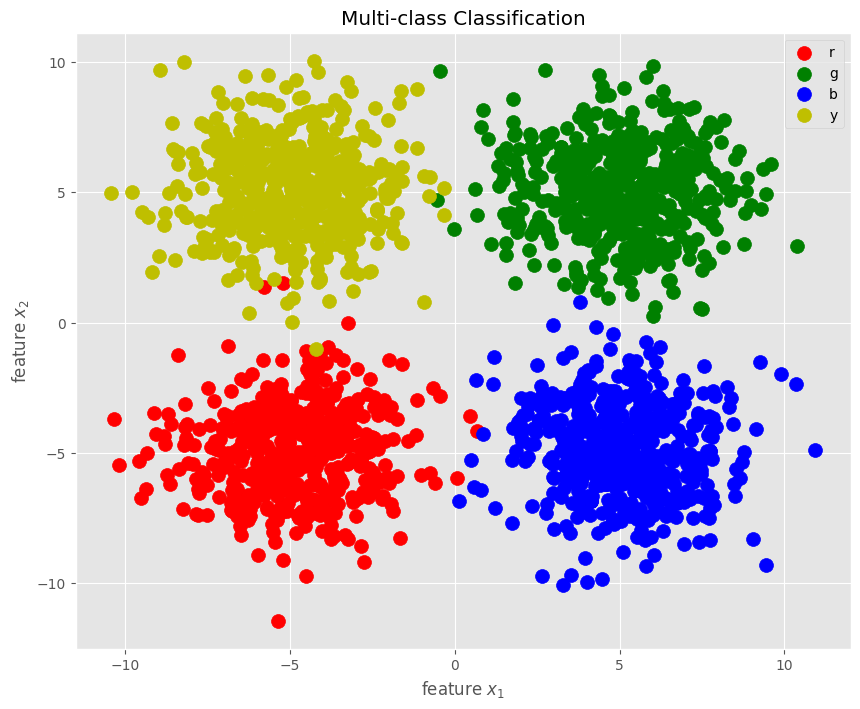

In [4]:
#generate training and testing set...by sampling from mutli-variate Gaussian
cp=5
nclasses=2
mean1 = [-cp,-cp]
mean2 = [cp,cp]
mean3 = [cp,-cp]
mean4 = [-cp,cp]
cov = [[3.0,0.0],[0.0,3.0]] 

#create some points for the training set...
nexamples=2000
nint = int(nexamples/4)
x1 = np.random.multivariate_normal(mean1,cov,nint)
x2 = np.random.multivariate_normal(mean2,cov,nint)
x3 = np.random.multivariate_normal(mean3,cov,nint)
x4 = np.random.multivariate_normal(mean4,cov,nint)

X=np.vstack((x1,x2,x3,x4))
Y=np.vstack((1*np.ones((nint,1)),2*np.ones((nint,1)),3*np.ones((nint,1)),4*np.ones((nint,1))))


plt.scatter(x1[:,0],x1[:,1], c='r', s=100)
plt.scatter(x2[:,0],x2[:,1], c='g', s=100)            
plt.scatter(x3[:,0],x3[:,1], c='b', s=100)
plt.scatter(x4[:,0],x4[:,1], c='y', s=100)            



plt.title("Multi-class Classification")
plt.xlabel("feature $x_1$")
plt.ylabel("feature $x_2$")
plt.legend(['r','g','b','y'])
fig_ml_in_10 = plt.gcf()
plt.savefig('multi-linear-class.svg',format='svg')
#create some points for the training set..

ntexamples=1000
nint2 = int(nexamples/4)
x1 = np.random.multivariate_normal(mean1,cov,nint2)
x2 = np.random.multivariate_normal(mean2,cov,nint2)
x3 = np.random.multivariate_normal(mean3,cov,nint2)
x4 = np.random.multivariate_normal(mean4,cov,nint2)

Xt=np.vstack((x1,x2,x3,x4))
Yt=np.vstack((1*np.ones((nint2,1)),2*np.ones((nint2,1)),3*np.ones((nint2,1)),4*np.ones((nint2,1))))


In [5]:
import randomForest as rf

In [6]:
rfc=rf.RandomForest(weaklearner='Conic')

In [7]:
print(X.shape, Y.shape)

(2000, 2) (2000, 1)


In [8]:
%pdb
rfc.train(X,Y)

Automatic pdb calling has been turned ON


In [9]:
len(rfc.trees)

10

In [10]:
%pdb
# Training Confusion Matrix...
Yp=rfc.predict(X)
print (Y.shape, len(Yp))
t.print_confusion_matrix(Yp,Y)

Automatic pdb calling has been turned OFF
(2000, 1) 2000


Predicted  1.0  2.0  3.0  4.0   All
Actual                             
1.0        496    0    2    2   500
2.0          0  500    0    0   500
3.0          6    1  493    0   500
4.0          3    4    0  493   500
All        505  505  495  495  2000

In [11]:
from nose.tools import assert_greater_equal
acc = np.sum(Y.flatten() ==  np.array(Yp).flatten()) / float(Y.shape[0])
print(acc)
assert_greater_equal(acc, 0.78)

0.991


c:\Users\muham\OneDrive\Documents\Semester 5\ML Assignments\A4\tools.py:698: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X[y==c, 0],


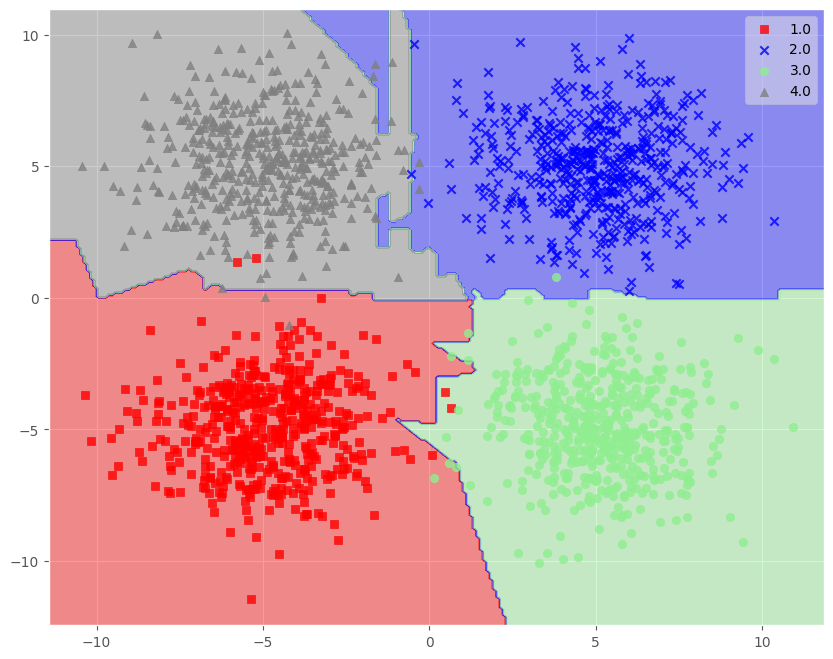

In [12]:
#It might take time, a little longer than the desired
t.plot_decision_regions(X,np.squeeze(Y), clf=rfc,res=0.1);
plt.savefig('training-boundary-rf-rlinear-10trees.svg',format='svg')

In [14]:
#Testing Confusion Matrix...
Ypt=rfc.predict(Xt)
print (Y.shape, len(Ypt))
t.print_confusion_matrix(Ypt,Yt)

(2000, 1) 2000


Predicted  1.0  2.0  3.0  4.0   All
Actual                             
1.0        500    0    0    0   500
2.0          0  497    3    0   500
3.0          2    1  497    0   500
4.0          3    2    0  495   500
All        505  500  500  495  2000

In [15]:
from nose.tools import assert_greater_equal
acc = np.sum(Yt.flatten() ==  np.array(Ypt)) / float(Yt.shape[0]) 

assert_greater_equal(acc, 0.78)

c:\Users\muham\OneDrive\Documents\Semester 5\ML Assignments\A4\tools.py:698: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X[y==c, 0],


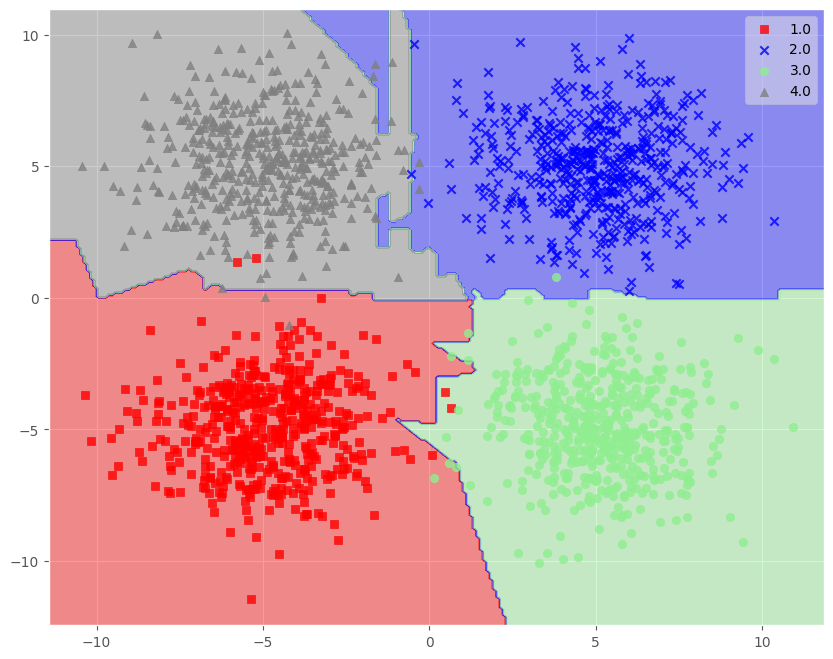

In [16]:
t.plot_decision_regions(X,np.squeeze(Y), clf=rfc,res=0.1);
plt.savefig('testing-boundary-rf-raa-10trees.svg',format='svg')

In [17]:
#plt.style.use('ggplot')
#matplotlib.rcParams['figure.figsize'] = (14.0, 8.0)
import tools as t

(10000, 2)
[np.float64(1.0), np.float64(2.0), np.float64(3.0), np.float64(4.0)]


AttributeError: 'Axes' object has no attribute 'hold'

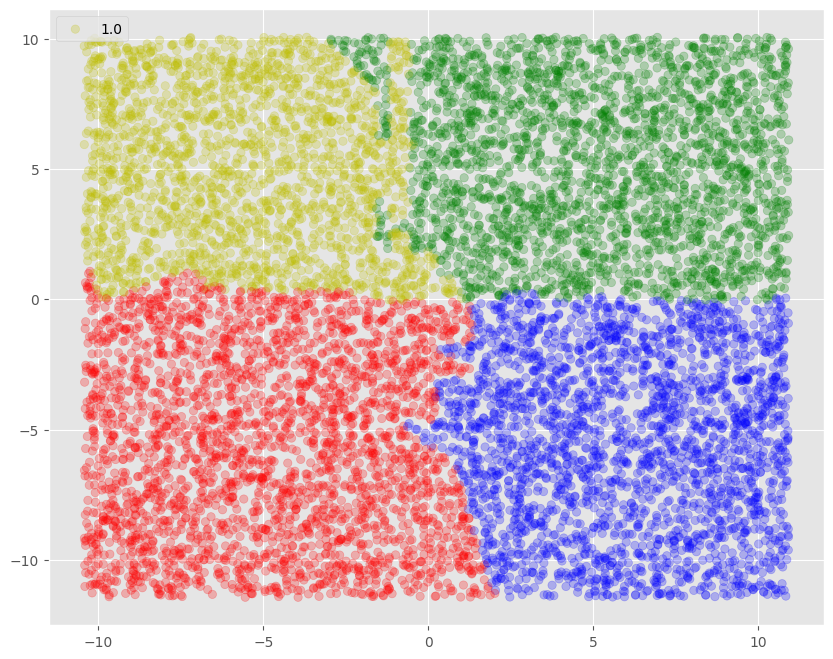

In [18]:
t.plot_points_range(rfc,X,Y,10000)

### Lets Plot Per-Tree Decision Boundary

Automatic pdb calling has been turned ON


c:\Users\muham\OneDrive\Documents\Semester 5\ML Assignments\A4\tools.py:698: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X[y==c, 0],


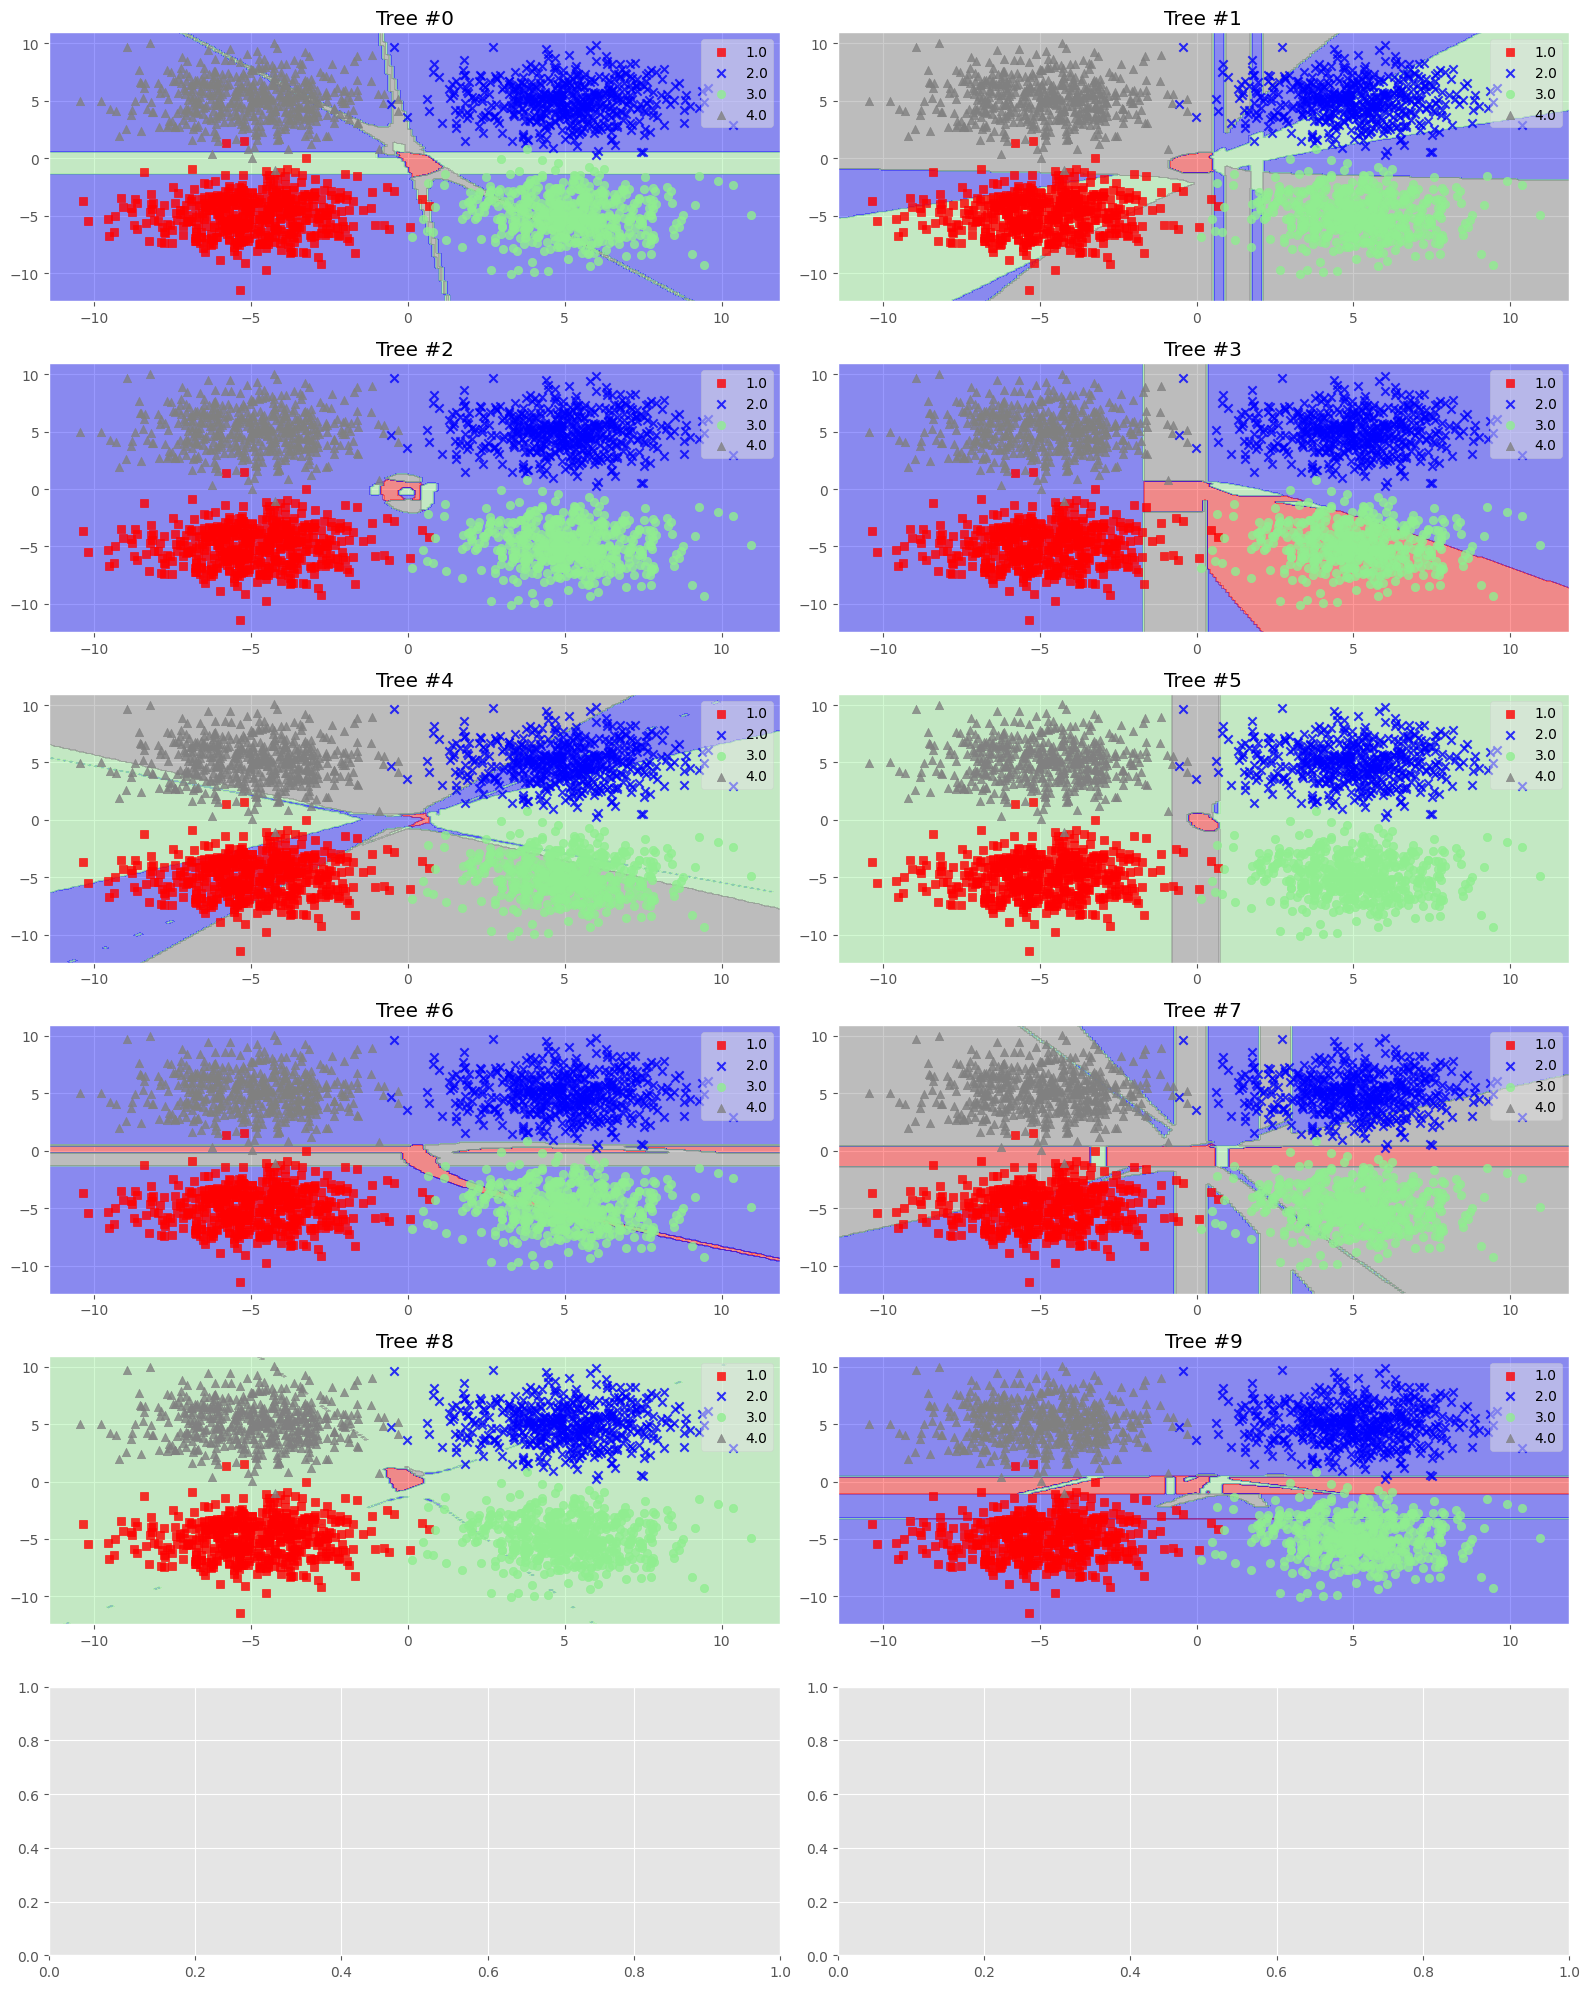

In [19]:
%pdb
ntrees=rfc.ntrees
nrows=ntrees/2 + 1
ncols=2
i=0
plt.subplots(int(nrows),ncols,figsize=(16,20))
for tree in rfc.trees:
    plt.subplot(nrows,ncols,i+1);
    t.plot_decision_regions(X,np.squeeze(Y),clf=tree,res=0.1);
    plt.title('Tree #{}'.format(i))
    i=i+1
plt.tight_layout()

#### What Can You conclude

## Lets Run on Nonlinear Data, The Spherical Examples...

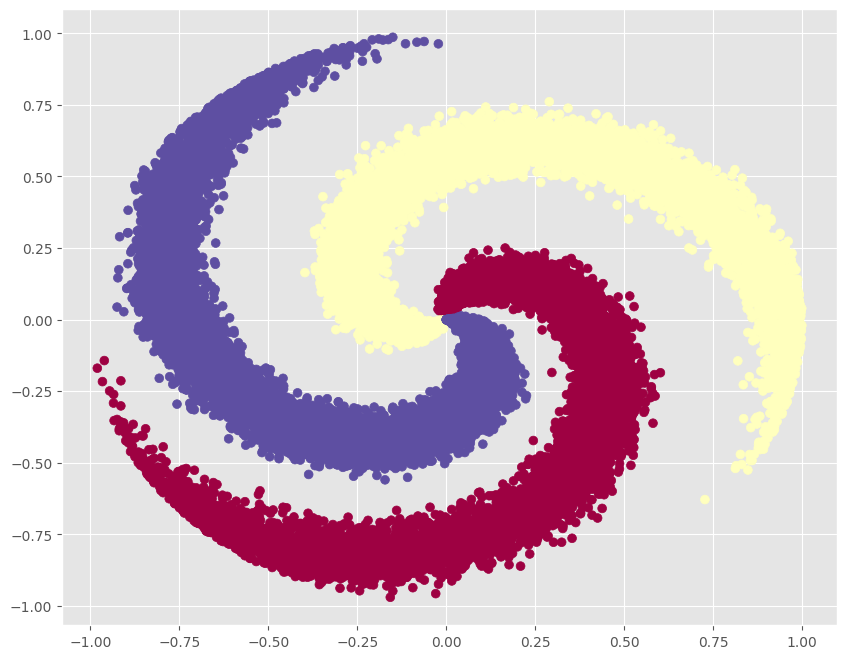

In [20]:
#Get Training Data from a spherical distribution and ...
X,Y=t.get_spherical_data(N=10000)

In [21]:
print(X.shape, Y.shape)

(30000, 2) (30000,)


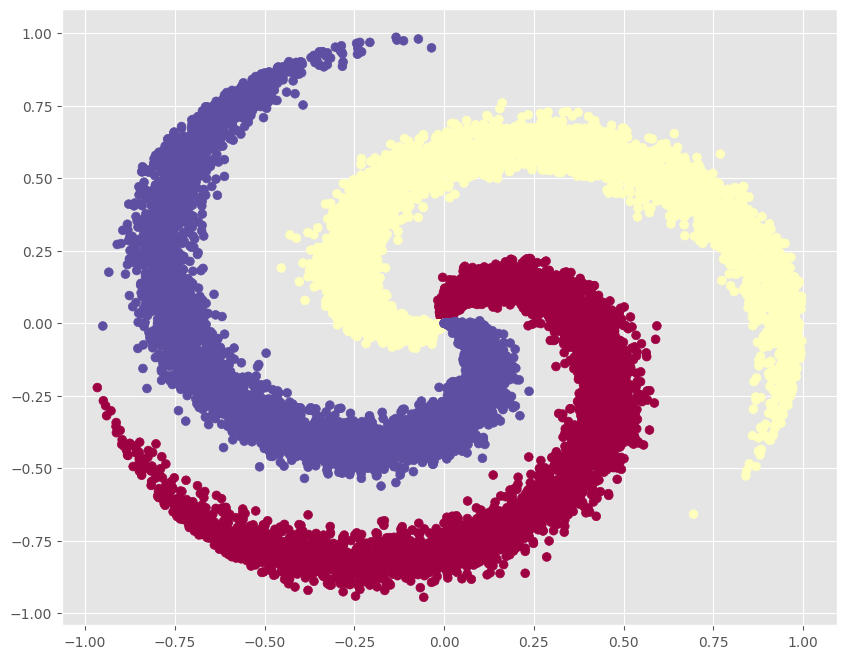

In [22]:
#Get Test Data 
Xtest,Ytest=t.get_spherical_data(N=5000)

In [23]:
rfc=rf.RandomForest(weaklearner='Conic',usebagging=False,ntrees=20)
rfc.train(X,Y[:,np.newaxis])

In [25]:
#Training Confusion Matrix
Yp=rfc.predict(X)
print (Y.shape, len(Yp))
t.print_confusion_matrix(Yp,Y)

(30000,) 30000


Predicted     0      1     2    All
Actual                             
0          8487   1435    78  10000
1             1   9999     0  10000
2             5    929  9066  10000
All        8493  12363  9144  30000

In [27]:
#Testing Confusion Matrix
Ypt=rfc.predict(Xtest)

print(Y.shape, len(Ypt))
t.print_confusion_matrix(Ypt,Ytest)

(30000,) 15000


Predicted     0     1     2    All
Actual                            
0          4233   722    45   5000
1             1  4999     0   5000
2             3   473  4524   5000
All        4237  6194  4569  15000

In [28]:
from nose.tools import assert_greater_equal
acc = np.sum(Y.flatten() ==  np.array(Yp)) / float(Y.shape[0]) 

assert_greater_equal(acc, 0.78)

(10000, 2)
[np.int64(0), np.int64(1), np.int64(2)]


AttributeError: 'Axes' object has no attribute 'hold'

> c:\users\muham\onedrive\documents\semester 5\ml assignments\a4\tools.py(844)plot_points_range()
    842     ax.legend([str(c) for c in uclasses])
    843 
--> 844     ax.hold(True)
    845     ax.scatter(X[:,0],X[:,1],
    846                   c=list(map(lambda x:colors[uclasses.index(x)],Y)),

--KeyboardInterrupt--

KeyboardInterrupt: Interrupted by user


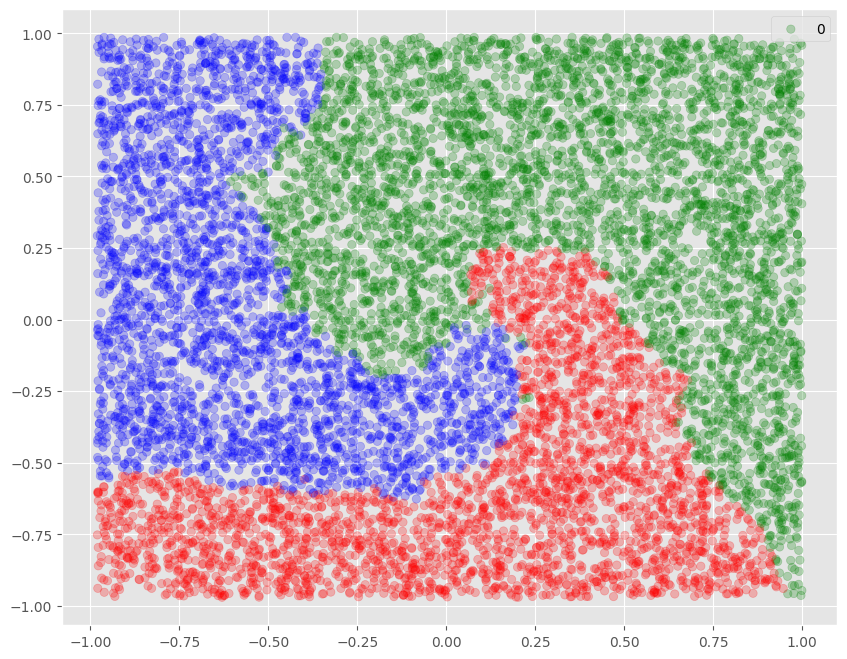

In [29]:
t.plot_points_range(rfc,X,Y)

c:\Users\muham\OneDrive\Documents\Semester 5\ML Assignments\A4\tools.py:698: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X[y==c, 0],


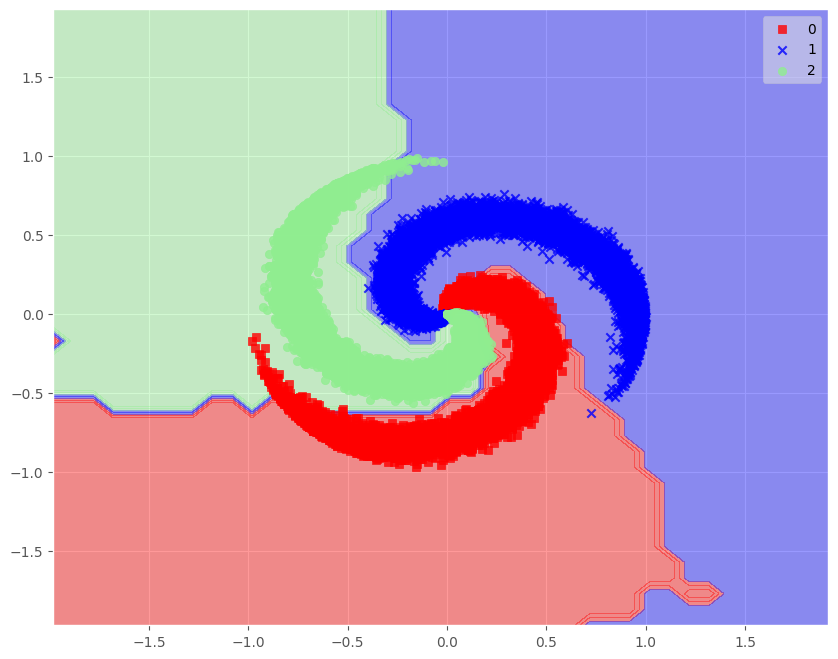

In [30]:
t.plot_decision_regions(X,Y,rfc,res=0.1)

###Lets Plot Per-Tree Decision Boundary

Automatic pdb calling has been turned OFF


<function matplotlib.pyplot.tight_layout(*, pad: 'float' = 1.08, h_pad: 'float | None' = None, w_pad: 'float | None' = None, rect: 'tuple[float, float, float, float] | None' = None) -> 'None'>

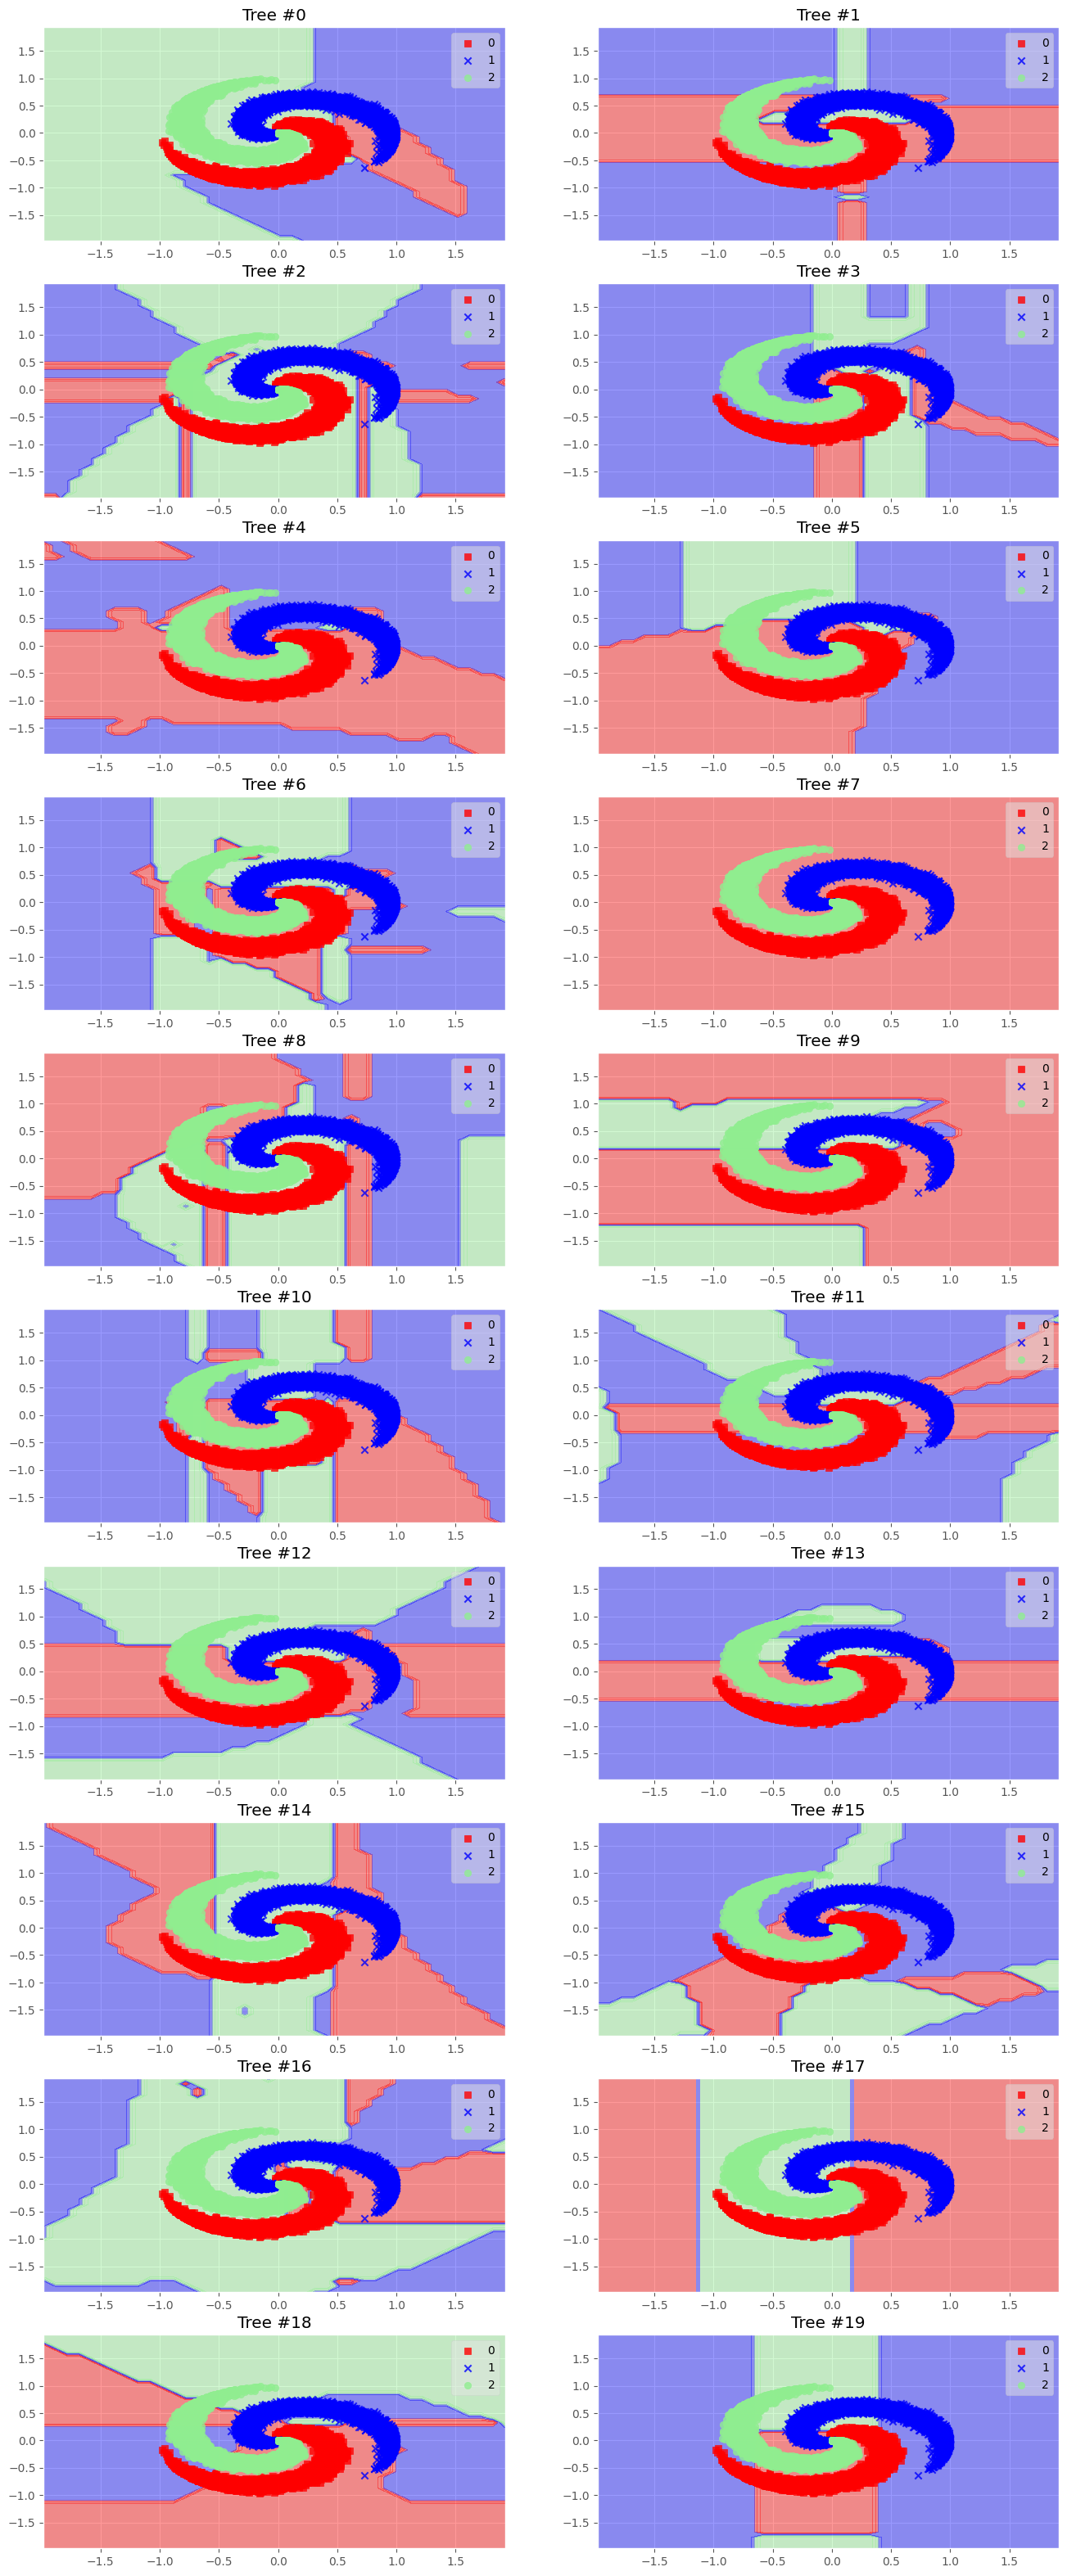

In [31]:
%pdb
ntrees=rfc.ntrees
nrows=ntrees/2 
ncols=2
i=0
plt.subplots(int(nrows),ncols,figsize=(16,40))
for tree in rfc.trees:
    plt.subplot(nrows,ncols,i+1);
    t.plot_decision_regions(X,Y,clf=tree,res=0.1);
    plt.title('Tree #{}'.format(i))
    i=i+1
plt.tight_layout
    

## TODO: Find Optimal Number of Trees for this data set, using cross validation...

In [36]:
nfolds = 4  
folds = t.generate_folds(X, Y, nfolds) 
ntrees = np.arange(2, 20) 
mean_acc = [] 
for p in range(len(ntrees)):
    totacc = []  
    for k in range(nfolds):
        rfc = rf.RandomForest(ntrees=p, weaklearner='Conic')
        Ytrain = folds[k][1][: , np.newaxis]
        
        rfc.train(folds[k][0], Ytrain)
        Ypt = rfc.predict(folds[k][2])
        accuracy = np.sum(Ypt == folds[k][3]) / float(folds[k][3].shape[0])
        totacc.append(accuracy)  
    mean_accuracy = np.mean(totacc)
    mean_acc.append(mean_accuracy)
    print(f"Mean accuracy for {ntrees[p]} trees: {mean_accuracy:.4f}")
    
    
optimal_trees = ntrees[np.argmax(mean_acc)]

print("Optimal trees " , optimal_trees)

Generating CV data for 4 classes
Mean accuracy for 2 trees: 0.0000


c:\Users\muham\OneDrive\Documents\Semester 5\ML Assignments\A4\randomForest.py:159: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  final_predictions = stats.mode(arr , axis = 0)


Mean accuracy for 3 trees: 0.8275
Mean accuracy for 4 trees: 0.8595
Mean accuracy for 5 trees: 0.9175
Mean accuracy for 6 trees: 0.9840
Mean accuracy for 7 trees: 0.9170
Mean accuracy for 8 trees: 0.8890
Mean accuracy for 9 trees: 0.9900
Mean accuracy for 10 trees: 0.9770
Mean accuracy for 11 trees: 0.9875
Mean accuracy for 12 trees: 0.9885
Mean accuracy for 13 trees: 0.9875
Mean accuracy for 14 trees: 0.9845
Mean accuracy for 15 trees: 0.9885
Mean accuracy for 16 trees: 0.9920
Mean accuracy for 17 trees: 0.9930
Mean accuracy for 18 trees: 0.9910
Mean accuracy for 19 trees: 0.9940
Optimal trees  19
